In [47]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Loading data:

In [48]:
state_pop = np.loadtxt('final_project_datasets/statePopulations.csv', delimiter=',')
poll_quality = np.loadtxt('final_project_datasets/poll_quality.csv', delimiter=',')
state_polls = np.loadtxt('final_project_datasets/state_polls.csv', delimiter=',')

**Simulation**
--

In [54]:
rnd.seed(42)

# constant and given values
n_simulations = 10000
avg_turnout = 0.6
n_states = len(state_pop)    # 11 states
n_polls = len(poll_quality)  # 7 polls
ppl_in_poll = 2000           # number of people polled in each state

# number of electoral college votes for each state
ppl_per_EC_vote = 1000  # given in the problem
EC_votes_by_state = state_pop / ppl_per_EC_vote
EC_vote_threshold = sum(EC_votes_by_state) / 2

# arrays to store results within each simulation
voter_turnouts = np.zeros(n_states)              # voter turnouts in every state
new_polls = np.zeros((n_states, n_polls))        # simulated poll results for each state and poll
weighted_polls = np.zeros(n_states)              # weighted average of simulated poll results

# storing final results of all simulations
EC_Barnes_wins = np.zeros(n_simulations)         # the number of times Barnes wins the Electoral college in a simulation
EC_votes_Barnes_wins = np.zeros(n_simulations)   # total EC votes Barnes wins in each simulation

pop_Barnes_wins = np.zeros(n_simulations)        # the number of times Barnes win the popular vote in a simulation (aka win pop vote across 11 states)
pop_votes_Barnes_wins = np.zeros(n_simulations)  # total votes for Barnes in each simulation

# simulation
for i in range(n_simulations):
    # variability in polling results
    for j in range(n_states):
        for k in range(n_polls):
            # convert poll percentages to probability
            convert_to_prob = state_polls[j][k] / 100
            
            # binomial distribution results in the actual number of voters for Barnes in 2000 people
            # need to binomial distribution/2000 to get the probability for voting Barnes
            new_polls[j][k] = (np.random.binomial(ppl_in_poll, convert_to_prob)) / ppl_in_poll

    # variability in turnout
    for j in range(n_states):
        voter_turnouts[j] = np.random.binomial(state_pop[j], 0.6)

    # weighted polls
    for j in range(n_states):
        weighted_polls[j] = np.average(new_polls[j, :], weights=poll_quality)

    # total votes in each state for Barnes
    votes = voter_turnouts * weighted_polls

    # winner of each state
    wins_state = votes > voter_turnouts / 2

    # total electoral college votes for Barnes
    EC_votes = sum(EC_votes_by_state[wins_state])

    EC_Barnes_wins[i] = EC_votes > EC_vote_threshold
    EC_votes_Barnes_wins[i] = EC_votes

    # total popular votes for Barnes 
    pop_Barnes_wins[i] = sum(votes) > sum(voter_turnouts) / 2
    pop_votes_Barnes_wins[i] = sum(votes)

**Plotting Results:**
--

**Popular Vote:**

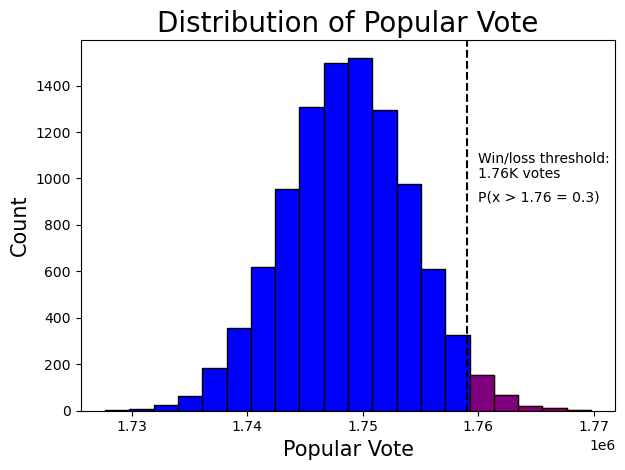

In [58]:
# histogram bins and counts
count, bins = np.histogram(pop_votes_Barnes_wins, bins=20) # Get the histogram bin edges and counts
bin_width = bins[1] - bins[0]                      
bin_center = bins[:-1] + bin_width/2               

# win/loss threshold for popular votes
pop_threshold = sum(0.6 *state_pop)/2

# probability of winning popular votes
p_wins_pop = pop_threshold/sum(state_pop)


# histogram with different colors for bars above and below the threshold
plt.bar(bin_center, count, 
        width=bin_width, color='b', edgecolor='k')
plt.bar(bin_center[bin_center > pop_threshold], count[bin_center > pop_threshold], 
        width=bin_width, color='r', edgecolor='k', alpha=0.5)

# vertical line for the threshold
plt.axvline(x= pop_threshold, color='k', linestyle='--')

# titles and labels
axis_font = 15
title_font = 20

plt.xlabel('Popular Vote', fontsize = axis_font)
plt.ylabel('Count', fontsize = axis_font)
plt.title('Distribution of Popular Vote', fontsize = title_font)

# label for the threshold line
plt.text(1760000, 1000, f'Win/loss threshold:\n{pop_threshold/1000000:.2f}K votes', color='k')

# label for the probability of Barnes winning popular vote
plt.text(1760000, 900, f"P(x > {pop_threshold/1000000:.2f} = {p_wins_pop})", color = 'k')

plt.tight_layout()
plt.show()

**Normal Distribution for popular vote:**

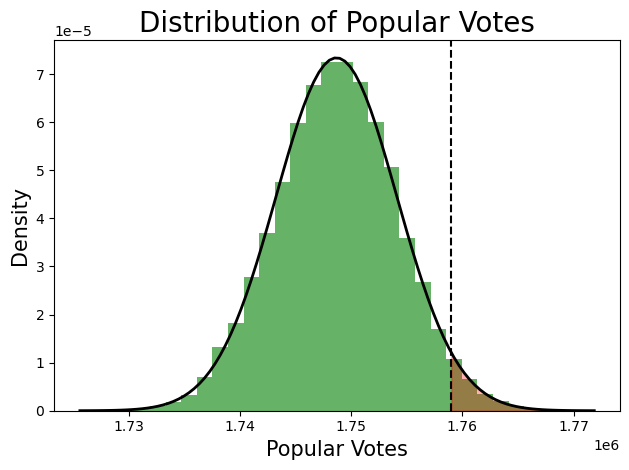

In [60]:
#normal distribution

# get the mean and standard deviation of the data
data_mean = np.mean(pop_votes_Barnes_wins)
data_std_dev = np.std(pop_votes_Barnes_wins)

# histogram
plt.hist(pop_votes_Barnes_wins, bins=30, density=True, alpha=0.6, color='g')

# calculate the normal distribution 
xmin, xmax = plt.xlim() # Get the x-axis limits of our histogram
x = np.linspace(xmin, xmax, 100) # Make a range of x values for our distribution
p = stats.norm.pdf(x, data_mean, data_std_dev) # Normal PDF with the data mean and std dev

# line for the normal distribution
plt.plot(x, p, 'k', linewidth=2) # Plot the normal distribution line

# fill the area under the curve less than time_spent
x_fill = np.linspace(pop_threshold,xmax, 100)     # Make the x values for the area less than time spent
p_fill = stats.norm.pdf(x_fill, data_mean, data_std_dev)  # Compute the pdf up to time_spent
plt.fill_between(x_fill, p_fill, color='r', alpha=0.3) # Fill the area under the curve


# vertical line for win/loss for popular vote
plt.axvline(x=pop_threshold, color='k', linestyle='--')

# title and labels
plt.title('Distribution of Popular Votes', fontsize = title_font)
plt.xlabel('Popular Votes', fontsize = axis_font)
plt.ylabel('Density', fontsize = axis_font)


plt.tight_layout()
plt.show()

**Electoral College Vote:**

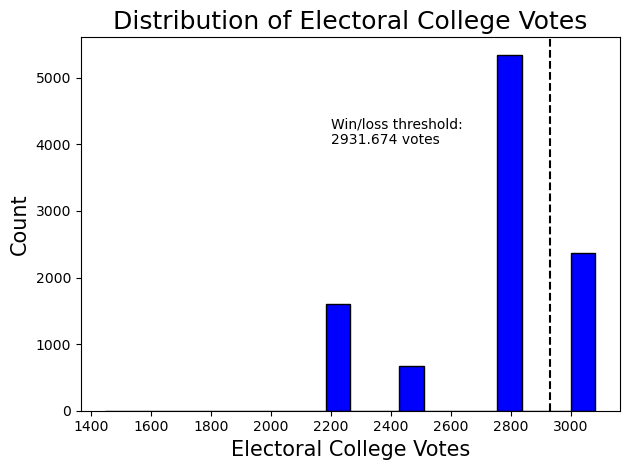

In [61]:
# histogram bins and counts
count, bins = np.histogram(EC_votes_Barnes_wins, bins=20) # Get the histogram bin edges and counts
bin_width = bins[1] - bins[0]                      
bin_center = bins[:-1] + bin_width/2              


# plot the histogram with different colors for bars above and below the threshold
plt.bar(bin_center, count, 
        width=bin_width, color='b', edgecolor='k')

# vertical line for the threshold
plt.axvline(x= EC_vote_threshold, color='k', linestyle='--')

# text label for the threshold line
plt.text(2200, 4000, f'Win/loss threshold:\n{EC_vote_threshold} votes', color='k')

# title and labels
title = 18

plt.title('Distribution of Electoral College Votes', fontsize = title)
plt.xlabel('Electoral College Votes', fontsize = axis_font)
plt.ylabel('Count', fontsize = axis_font)

plt.tight_layout()
plt.show()

**Estimate of the overall probability that Barnes will win the election:**
--

In [62]:
# wins electoral college vote

wins_election = sum(EC_Barnes_wins)/n_simulations
wins_percent = wins_election*100
print(f"Barnes has a {wins_percent:.2f}% chance of winning the election against Nobles.")

Barnes has a 23.76% chance of winning the election against Nobles.
